In [1]:
import kwant
import semicon

import numpy as np
import scipy.linalg as la
import scipy.sparse.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

# semicon related code

In [2]:
widths = [5, 12.5, 5, 5]
grid_spacing = 0.5
gamma_0 = 1.0

hamiltonian = semicon.models.foreman('z')

AlSb = semicon.parameters.bulk('lawaetz', 'AlSb', gamma_0, valence_band_offset=.18)
InAs = semicon.parameters.bulk('lawaetz', 'InAs', gamma_0)
GaSb = semicon.parameters.bulk('lawaetz', 'GaSb', gamma_0, valence_band_offset=.56)

two_deg_params, walls = semicon.parameters.two_deg(
    parameters = [AlSb, InAs, GaSb, AlSb],
    widths = widths,
    grid_spacing=grid_spacing,
    extra_constants=semicon.parameters.constants,
)

# standard python and kwant code

In [3]:
template = kwant.continuum.discretize(hamiltonian, coords='z', grid_spacing=grid_spacing)

shape = lambda site: 0 - grid_spacing / 2 < site.pos[0] < sum(widths)

syst = kwant.Builder()
syst.fill(template, shape, (0, ))
syst = syst.finalized()

In [4]:
%%time

momenta = np.linspace(-.45, .45, 101)
energies = []
for k in momenta:
    p = {'k_x': k, 'k_y': 0, **two_deg_params}
    ham = syst.hamiltonian_submatrix(params=p, sparse=True)
    ev, evec = sla.eigsh(ham, k=20, sigma=.52)
    energies.append(ev)

CPU times: user 7.34 s, sys: 29.8 ms, total: 7.37 s
Wall time: 7.4 s


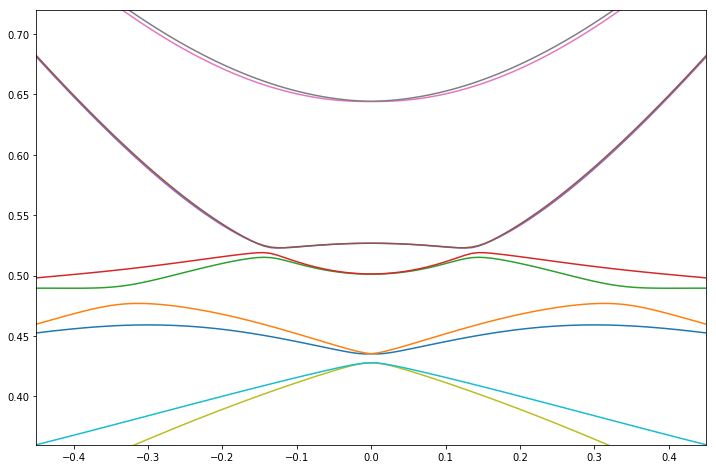

In [5]:
plt.figure(figsize=(12, 8))

plt.plot(momenta, np.sort(energies))

plt.xlim(min(momenta), max(momenta))
plt.ylim(0.36, .72);